In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# unzipping 2018 dataset
! unzip "/content/drive/MyDrive/07012018.zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/53174.jpg          
  inflating: data/33858.jpg          
  inflating: data/15121.jpg          
  inflating: data/8755.jpg           
  inflating: data/44408.jpg          
  inflating: data/7466.jpg           
  inflating: data/23493.jpg          
  inflating: data/12896.jpg          
  inflating: data/45716.jpg          
  inflating: data/6778.jpg           
  inflating: data/33680.jpg          
  inflating: data/1017.jpg           
  inflating: data/42079.jpg          
  inflating: data/22955.jpg          
  inflating: data/583.jpg            
  inflating: data/55505.jpg          
  inflating: data/13550.jpg          
  inflating: data/1771.jpg           
  inflating: data/55263.jpg          
  inflating: data/13236.jpg          
  inflating: data/14559.jpg          
  inflating: data/34689.jpg          
  inflating: data/45070.jpg          
  inflating: data/53612.jpg          
  inflating: data/15647.jpg          

### 1. Introduction With Data & Some EDA.

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

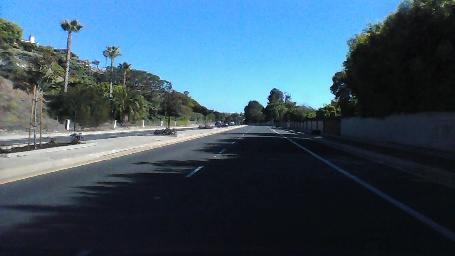

In [5]:
random_image_1 = cv2.imread("/content/data/50.jpg")
ax = cv2_imshow(random_image_1)

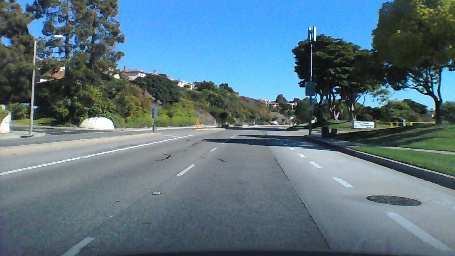

In [6]:
random_image_2 = cv2.imread("/content/data/500.jpg")
ax = cv2_imshow(random_image_2)

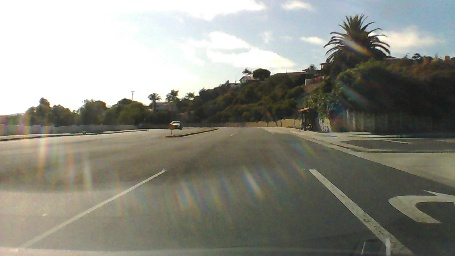

In [7]:
random_image_2 = cv2.imread("/content/data/5000.jpg")
ax = cv2_imshow(random_image_2)

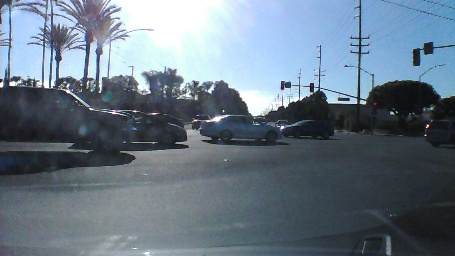

In [9]:
random_image_2 = cv2.imread("/content/data/50000.jpg")
# Dispaling Image no. 50000.jpg
ax = cv2_imshow(random_image_2)

In [10]:
steering_angles_with_image_names = dict()
with open("data.txt") as file_in:
    for line in file_in:
        name = line.split(",")[0].split(" ")[0]
        angle = float(line.split(",")[0].split(" ")[1])
        steering_angles_with_image_names[name] = angle

In [11]:
import pandas as pd 
from tqdm import tqdm
import numpy as np
import scipy
import os

In [12]:
dataframe_of_details = pd.DataFrame()
paths_of_images = []
angles_of_steering = []
image_names = []
for image_num in tqdm(range(len(steering_angles_with_image_names))):
  name = str(image_num)+".jpg"
  path = "/content/data/"+str(image_num)+".jpg"
  angle = steering_angles_with_image_names.get(str(image_num)+".jpg")
  image_names.append(name)
  paths_of_images.append(path)
  angles_of_steering.append(angle)
dataframe_of_details["image_name"] = image_names
dataframe_of_details["image_path"] = paths_of_images
dataframe_of_details["steering_angle"] = angles_of_steering
print("Shape of DataFrame is :",dataframe_of_details.shape)
dataframe_of_details.head(3)

100%|██████████| 63825/63825 [00:00<00:00, 572523.01it/s]

Shape of DataFrame is : (63825, 3)


,image_name,image_path,steering_angle
0,0.jpg,/content/data/0.jpg,0.0
1,1.jpg,/content/data/1.jpg,0.0
2,2.jpg,/content/data/2.jpg,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


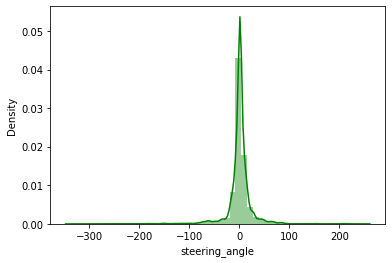

In [13]:
import seaborn as sns
ax = sns.distplot(dataframe_of_details["steering_angle"],color = "green")

### 2. Preprocessing Of Images.

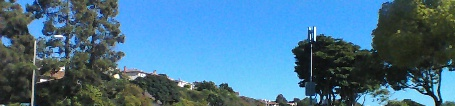

In [14]:
random_image_2 = cv2.imread("/content/data/500.jpg")
above_part_of_image = random_image_2[:106]
ax = cv2_imshow(above_part_of_image)

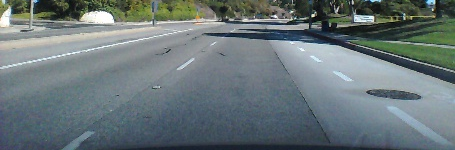

In [15]:
# Taking last 150 rows of random_image_2
down_part_of_image = random_image_2[-150:]
ax = cv2_imshow(down_part_of_image)

In [16]:
! mkdir cropped_images
for image_num in range(len(dataframe_of_details)):
  image =  cv2.imread(dataframe_of_details.iloc[image_num]["image_path"])
  new_image = image[-150:]
  cv2.imwrite(r'/content/cropped_images/'+str(image_num)+".jpg", new_image)
print("Cropped_images Folder have",len(os.listdir("/content/cropped_images")),"Images..!!")

Cropped_images Folder have 63825 Images..!!


In [17]:
! mkdir resized_images
for image_num in tqdm(range(len(os.listdir("/content/cropped_images")))):
  image = cv2.imread("/content/cropped_images/"+str(image_num)+".jpg")
  # cv2.imresize resizes the image in to desiewd shapes. It takes 2 arguments (image_for_resizing,(desired_width,desired_height))
  resized_image = cv2.resize(image, (200,66))
  cv2.imwrite(r'/content/resized_images/'+str(image_num)+".jpg", resized_image)
print("Before Resizing The shape of images is :",image.shape)
print("Before Resizing The shape of images is :",resized_image.shape)
print("resized_images Folder have",len(os.listdir("/content/resized_images")),"Images..!!")

100%|██████████| 63825/63825 [01:46<00:00, 596.93it/s]


Before Resizing The shape of images is : (150, 455, 3)
Before Resizing The shape of images is : (66, 200, 3)
resized_images Folder have 63825 Images..!!


In [18]:
image_paths = []
for image_num in range(len(os.listdir("/content/resized_images"))):
  path = "/content/resized_images/"+str(image_num)+".jpg"
  image_paths.append(path)
dataframe_of_details = dataframe_of_details.drop(["image_path"], axis=1)
dataframe_of_details["image_path"] = image_paths
print("Shape of dataframe_of_details is :",dataframe_of_details.shape)
dataframe_of_details.head(3)

Shape of dataframe_of_details is : (63825, 3)


,image_name,steering_angle,image_path
0,0.jpg,0.0,/content/resized_images/0.jpg
1,1.jpg,0.0,/content/resized_images/1.jpg
2,2.jpg,0.0,/content/resized_images/2.jpg


In [19]:
angles_in_radians = [((angle_in_degree) * scipy.pi/180) for angle_in_degree in list(dataframe_of_details["steering_angle"])]
dataframe_of_details["angles_in_radians"] = angles_in_radians
dataframe_of_details.head(3)

,image_name,steering_angle,image_path,angles_in_radians
0,0.jpg,0.0,/content/resized_images/0.jpg,0.0
1,1.jpg,0.0,/content/resized_images/1.jpg,0.0
2,2.jpg,0.0,/content/resized_images/2.jpg,0.0


### 3. Creating Data Pipeline For feeding Data to model. 

In [20]:
import pandas as pd 
from tqdm import tqdm
import numpy as np
import scipy
from tqdm import tqdm
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
test_dataframe = dataframe_of_details.iloc[int(len(dataframe_of_details)*0.85):int(len(dataframe_of_details)*0.90)]
print("We have information about",len(test_dataframe),"Images in Test Dataframe")
test_dataframe.head(3)

We have information about 3191 Images in Test Dataframe


,image_name,steering_angle,image_path,angles_in_radians
54251,54251.jpg,-7.56,/content/resized_images/54251.jpg,-0.131947
54252,54252.jpg,-8.17,/content/resized_images/54252.jpg,-0.142593
54253,54253.jpg,-9.08,/content/resized_images/54253.jpg,-0.158476


In [22]:
datagen = ImageDataGenerator(rescale = 1/255)

In [23]:
test_generator = datagen.flow_from_dataframe(test_dataframe,
                                              x_col='image_path',
                                              y_col='angles_in_radians',
                                              directory = r"/content/resized_images",
                                              target_size=(66,200),
                                              batch_size=32,
                                              class_mode='other',
                                              shuffle=True,
                                              )

Found 3191 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

In [24]:
test_images_index = list(range(test_dataframe.index.start,test_dataframe.index.stop))
train_images_index = list(set(list(range(0,len(dataframe_of_details)))) - set(test_images_index))
train_dataframe = dataframe_of_details.iloc[train_images_index]
print("We have information about",len(train_dataframe),"Images in train_dataframe..!!")
train_dataframe.head(3)

We have information about 60634 Images in train_dataframe..!!


,image_name,steering_angle,image_path,angles_in_radians
0,0.jpg,0.0,/content/resized_images/0.jpg,0.0
1,1.jpg,0.0,/content/resized_images/1.jpg,0.0
2,2.jpg,0.0,/content/resized_images/2.jpg,0.0


In [25]:
train_generator = datagen.flow_from_dataframe(train_dataframe,
                                              x_col='image_path',
                                              y_col='angles_in_radians',
                                              directory = r"/content/resized_images",
                                              target_size=(66,200),
                                              batch_size=32,
                                              class_mode='other',
                                              shuffle = True,
                                              )

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 60634 validated image filenames.


### 4 . Model Building And Training :

In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,InputLayer
from tensorflow.keras.layers import Conv2D
import datetime
from tensorflow.keras.initializers import TruncatedNormal,Constant

In [27]:
model = Sequential()
model.add(InputLayer(input_shape=(66,200,3)))
model.add(tf.keras.layers.Conv2D(24,5,strides=(2, 2),padding="valid",activation="relu",
                                 kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),bias_initializer = Constant(value = 0.1)))
model.add(tf.keras.layers.Conv2D(36,5,strides=(2, 2),padding="valid",activation="relu",
                                 kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),bias_initializer = Constant(value = 0.1)))
model.add(tf.keras.layers.Conv2D(48,5,strides=(2, 2),padding="valid",activation="relu",
                                 kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),bias_initializer = Constant(value = 0.1)))
model.add(tf.keras.layers.Conv2D(64,3,strides=(1, 1),padding="valid",activation="relu",
                                 kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),bias_initializer = Constant(value = 0.1)))
model.add(tf.keras.layers.Conv2D(64,3,strides=(1, 1),padding="valid",activation="relu",
                                 kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),bias_initializer = Constant(value = 0.1)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1164,kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),
                bias_initializer = Constant(value = 0.1)))
model.add(Dropout(0.5))
model.add(Dense(100,kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),
                bias_initializer = Constant(value = 0.1)))
model.add(Dropout(0.5))
model.add(Dense(50,kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),
                bias_initializer = Constant(value = 0.1)))
model.add(Dropout(0.5))
model.add(Dense(10,kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),
                bias_initializer = Constant(value = 0.1)))
model.add(Dropout(0.5))
model.add(Dense(1,activation="linear",kernel_initializer = TruncatedNormal(mean=0., stddev=0.1),
                bias_initializer = Constant(value = 0.1)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0

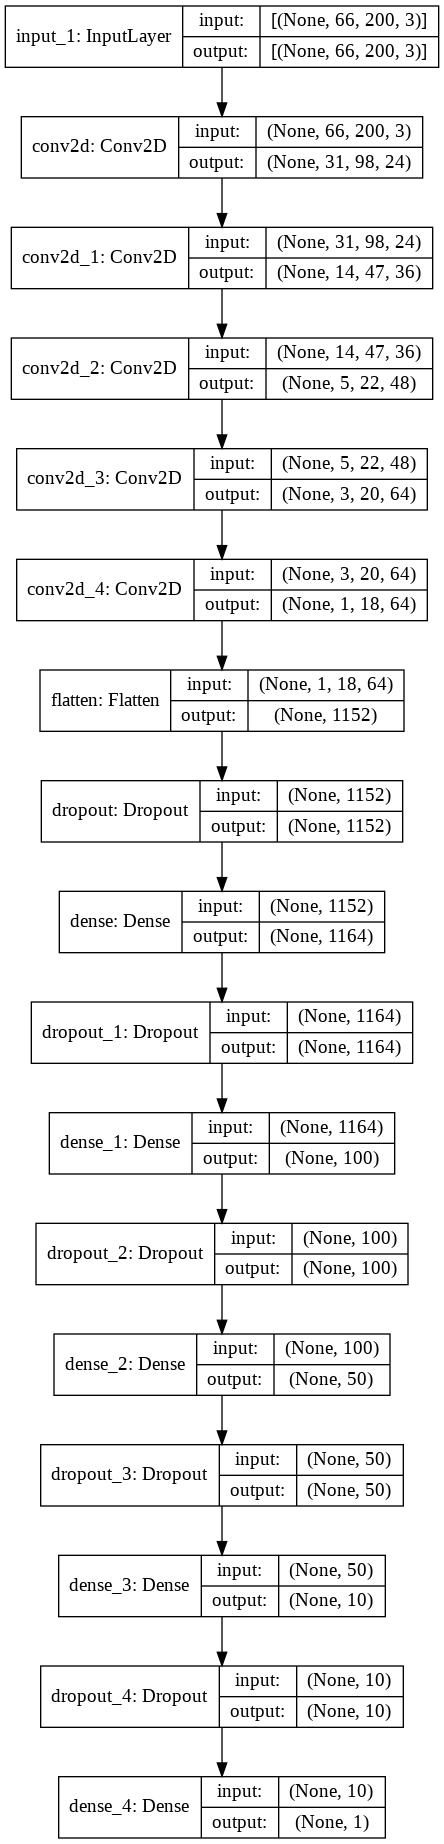

In [29]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes = True)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
!mkdir model_save
filepath="/content/model_save/model-{epoch:02d}-{val_loss:.4f}.hdf5"
model_saving_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only = True, verbose=1)

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.n//train_generator.batch_size,
                              epochs = 10,validation_data = valid_generator,
                              validation_steps = valid_generator.n//valid_generator.batch_size,
                              use_multiprocessing=True,shuffle = True,
                              callbacks = [model_saving_callback]
                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1894/1894 [==============================] - 71s 37ms/step - loss: 0.2224 - val_loss: 0.0138

Epoch 00001: val_loss improved from inf to 0.01381, saving model to /content/model_save/model-01-0.0138.hdf5
Epoch 2/10
1894/1894 [==============================] - 70s 37ms/step - loss: 0.2277 - val_loss: 0.0134

Epoch 00002: val_loss improved from 0.01381 to 0.01345, saving model to /content/model_save/model-02-0.0134.hdf5
Epoch 3/10
1894/1894 [==============================] - 69s 36ms/step - loss: 0.2326 - val_loss: 0.0145

Epoch 00003: val_loss did not improve from 0.01345
Epoch 4/10
1894/1894 [==============================] - 68s 36ms/step - loss: 0.2219 - val_loss: 0.0134

Epoch 00004: val_loss improved from 0.01345 to 0.01343, saving model to /content/model_save/model-04-0.0134.hdf5
Epoch 5/10
1894/1894 [==============================] - 69s 37ms/step - loss: 0.2256 - val_loss: 0.0139

Epoch 00005: val_loss did not improve from 0.01343
Epoch 6/10
1894/1894 [================

### 5.. Model In Action. 

In [ ]:
test_images = []
for path in list(test_dataframe["image_path"]):
  image = cv2.imread(path)
  cropped_image = image[-150:]
  resized_image = cv2.imresize(cropped_image,(66,200))
  normalized_image = resized_image /255.
  test_images.append(normalized_image)
print("We have information about",len(test_images),"Images in test_images")

In [ ]:
steering_wheel = cv2.imread('steering_wheel.jpg',0)
steering_wheel = cv2.resize(img, (216,216))
image_names = os.listdir(r"C:\Users\AC\Downloads\Self_Driving_Car\Test_images_full_size")
angles = list(model.predict(test_images)
i = 0
while(cv2.waitKey(30) != ord('q')):
  full_image = cv2.imread(r"C:\Users\AC\Downloads\Self_Driving_Car\resized_test_images\\"+image_names[i])
  degrees = angles[i]
  cv2.imshow("frame",full_image)
  M = cv2.getRotationMatrix2D((cols/2,rows/2),-degrees,1)
  dst = cv2.warpAffine(img,M,(cols,rows))
  cv2.imshow("angle",dst)
  i += 1
cv2.destroyAllWindows()

Output :

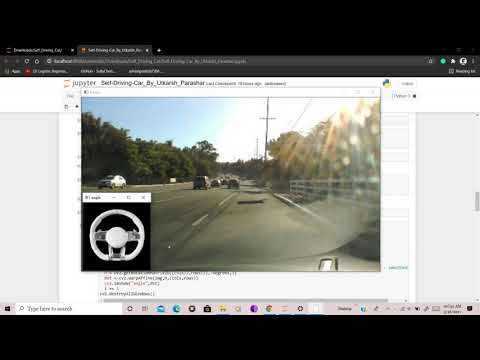

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('AX6i2sd2WGU', width=800, height=300)

## Thanks For Coming..!! :) :)